### ID : 2019HT12221
### Name : Renuka Dharmadhikari


## Machine Learning Assignment


Dataset information:

The dataset used for this assignment is regarding Cancer in women. It contains the laboratory values of female patients who suffered from cancer.

Attribute Information:

All attributes are numericals.

1. Pregnancies - Number of pregnancies the woman had in the past
2. Glucose - The glucose levels of the patient
3. BloodPressure - Blood pressure of the patient
4. SkinThickness - Thickness of the skin
5. Insulin 
6. BMI - Body Mass Index value of the patient
7. Cancer_Markers 
8. Age 
9. Outcome


The Algorithm is being used in this data for training and testing:
#### 1. Logistic Regression
#### 2. Decision Tree


# LOGISTIC REGRESSION

In [66]:
import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [67]:
df = pd.read_csv("//Users/i332409/Downloads/CancerDataset.csv")

In [68]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [69]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Cancer_Markers', 'Age', 'Outcome'],
      dtype='object')


In [70]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI','Cancer_Markers', 'Age', 'Outcome']
X = df[feature_cols] 
y = df.Outcome 

In [71]:
# split X and y into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [72]:
from sklearn.linear_model import LogisticRegression


In [73]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

/Users/i332409/Documents/Softwares/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [74]:
y_pred=logreg.predict(X_test)

## Visualizing Confusion Matrix using Heatmap

In [75]:
# import the metrics class
from sklearn import metrics
CM = metrics.confusion_matrix(y_test, y_pred)
CM

array([[130,   0],
       [  0,  62]])

In [76]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

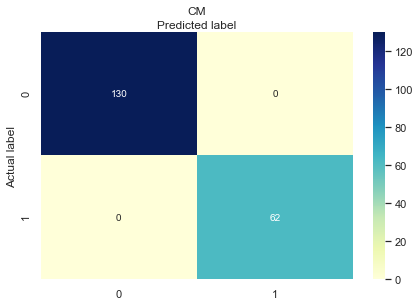

In [77]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(CM), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('CM', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [78]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


## ROC Curve

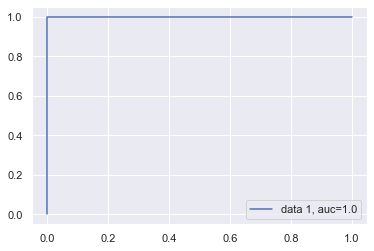

In [79]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Decision tree

In [80]:
import pandas as pd
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics 

In [81]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [82]:
#Columns in the data
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Cancer_Markers', 'Age', 'Outcome'],
      dtype='object')


In [83]:
#Data information_This help to fine Null values and also data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pregnancies     768 non-null    int64  
 1   Glucose         768 non-null    int64  
 2   BloodPressure   768 non-null    int64  
 3   SkinThickness   768 non-null    int64  
 4   Insulin         768 non-null    int64  
 5   BMI             768 non-null    float64
 6   Cancer_Markers  768 non-null    float64
 7   Age             768 non-null    int64  
 8   Outcome         768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Countplot

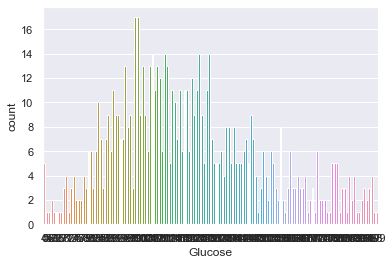

In [84]:
sns.countplot(df['Glucose'],label="count")

### Heatmap to check null values


In [85]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [86]:
import numpy as np
import missingno as msno 

In [87]:
#Check for any null values
df.isnull().sum()

Pregnancies       0
Glucose           0
BloodPressure     0
SkinThickness     0
Insulin           0
BMI               0
Cancer_Markers    0
Age               0
Outcome           0
dtype: int64

### Above we can observe that there are no null values

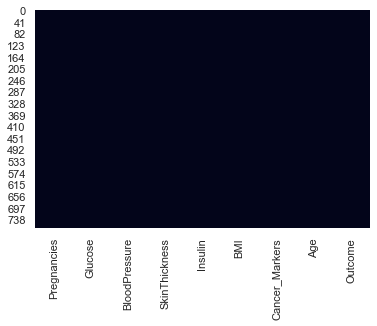

In [88]:
#visualize the location of missing values.
sns.heatmap(df.isnull(), cbar=False)

### From above heatmap, it is observed that there are no missing values

### Label Encoding

In [89]:
label_encoder = preprocessing.LabelEncoder() 

In [90]:
df['Glucose']= label_encoder.fit_transform(df['Glucose']) 

In [91]:
df['Glucose'].unique() 

array([ 86,  23, 121,  27,  75,  54,  16,  53, 133,  63,  48, 106,  77,
       126, 104,  38,  56,  45,  41,  64,  37, 132,  57,  81,  85,  35,
        83,  55,  47,  96,  26,  30,  60,  76,  40,  28,  49, 118,  71,
        44, 109,  97,  84,   9,  43,  39, 114,  88,  11, 124,  22,   1,
        79,  52,  33,  67,  17,   0,   5,  69,  50,  51,  12,  21,  74,
        18,  61,  19,  72,  80,  82,  31, 101,  89,  34,  93,  14,  98,
        62, 100,  70,  58, 111, 108,  66,  46,  92,   3,  94,  91, 125,
        90,  42,  25,  13, 117,  68, 130, 119,  73, 122,  78, 115, 102,
        29, 103,  24, 129, 128,  99, 105,  15, 120,  95, 116,   4,  36,
        65,  20,  10, 110,  32, 113, 131,   8, 123, 134,  59,   7, 112,
       135,   2, 107,  87,   6, 127])

In [92]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
0,6,86,72,35,0,33.6,0.627,50,1
1,1,23,66,29,0,26.6,0.351,31,0
2,8,121,64,0,0,23.3,0.672,32,1
3,1,27,66,23,94,28.1,0.167,21,0
4,0,75,40,35,168,43.1,2.288,33,1


# startified splitting of train and test data

In [93]:
# dropping the response variable so that X contains features 
X = df.drop(['Outcome'], axis=1)

In [94]:
X.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age
0,6,86,72,35,0,33.6,0.627,50
1,1,23,66,29,0,26.6,0.351,31
2,8,121,64,0,0,23.3,0.672,32


In [95]:
# Response variable with Outcome
y = df['Outcome'] 

In [96]:
from sklearn.model_selection import StratifiedShuffleSplit

In [97]:
# splitting the data using strartied split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.67,random_state=42,stratify=y)

In [98]:
print(f"Train labels:\n{y_train}")
print(f"Test labels:\n{y_test}")

Train labels:
657    0
125    1
184    0
210    0
147    0
      ..
113    0
556    0
586    1
648    1
107    0
Name: Outcome, Length: 514, dtype: int64
Test labels:
373    0
164    1
415    1
477    0
75     0
      ..
71     0
672    0
124    1
763    0
437    0
Name: Outcome, Length: 254, dtype: int64


In [99]:
print(f"Numbers of train instances by class: {np.bincount(y_train)}")
print(f"Numbers of test instances by class: {np.bincount(y_test)}")

Numbers of train instances by class: [335 179]
Numbers of test instances by class: [165  89]


# Decision tree with complete data

In [100]:
# Create Decision Tree classifer object
classf = DecisionTreeClassifier()

# Train Decision Tree Classifer
classf = classf.fit(X_train,y_train)

In [101]:
#Predict the response for test dataset
y_pred = classf.predict(X_test)

In [102]:
#validate the model
print(y_pred )

[0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0
 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0
 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0]


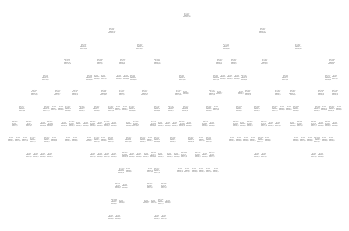

In [103]:
tree.plot_tree(classf);

Classification report

In [104]:
confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))

[[128  37]
 [ 48  41]]


In [105]:
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6653543307086615


In [106]:
from sklearn.model_selection import cross_val_score

In [107]:
accuracy = cross_val_score(classf, X, y, scoring='accuracy', cv = 10)
print(accuracy)

[0.64935065 0.72727273 0.72727273 0.57142857 0.72727273 0.72727273
 0.81818182 0.77922078 0.60526316 0.73684211]


In [108]:
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

Accuracy of Model with Cross Validation is: 70.69377990430621


In [109]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.5256410256410257
Recall: 0.4606741573033708


# Summary

### Logistics regression :

1. The Confusion Matrix shows a true postiive score of 130 and true negative score as 62 with zero false negatives and false positives. Which means there are no actual classes contradicting with predicting classes.
2. The accuracy value of 1.0 would mean that the prediction of the algorithm for the given data set is 100% accurate
3. The precesion value is 1.0 which means that the data points in the set were actually 100% relevant.
4. Recall score of 1.0 indicates that the model is able to find all the relevant cases within a datasets at 100%.


### Decision Tree :

1. The Confusion Matrix shows a true postiive score of 129 and true negative score as 45 with 36 false negatives and 44 false positives. Which means there are total 44+36= 80 actual classes contradicting with predicting classes.
2. The accuracy value of the model is 0.7056732740943268 states that the prediction of the algorithm for the given data set is 70.567 accurate.
3. The precesion value is 0.5555555555 which means that the data points in the set were actually 55.5555 relevant.
4. Recall score of 0.5056179775280899 indicates that the model is able to find all the relevant cases within a datasets at 50.5617%


## Conclusion
### For the given dataset, Logistic regression is the best suitable than decision tree model.
